In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../datasets/data_for_lr.csv')

# Drop the missing values
data = data.dropna()

# Training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# Valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forward_propagation(train_input) 

            # Cost function 
            cost = self.cost_function(predictions, train_output) 

            # Back propagation 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            # Update parameters 
            self.update_parameters(derivatives, learning_rate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 


MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 11196.476239175852
Iteration = 1, Loss = 1356.2028413304513
Iteration = 1, Loss = 170.34280574240205
Iteration = 1, Loss = 27.433763380600098
Iteration = 2, Loss = 10.211665788213308
Iteration = 3, Loss = 8.136212849625544
Iteration = 4, Loss = 7.886095427944893
Iteration = 5, Loss = 7.85595080084259
Iteration = 6, Loss = 7.852315289654659
Iteration = 7, Loss = 7.851874415701828
Iteration = 8, Loss = 7.851818530579573
Iteration = 9, Loss = 7.851809041078659
Iteration = 10, Loss = 7.851805143032553
Iteration = 11, Loss = 7.8518019190951
Iteration = 12, Loss = 7.851798776672547
Iteration = 13, Loss = 7.851795644350872
Iteration = 14, Loss = 7.851792513523875
Iteration = 15, Loss = 7.851789383154388
Iteration = 16, Loss = 7.8517862531174
Iteration = 17, Loss = 7.851783123397808
Iteration = 18, Loss = 7.851779993993772
Iteration = 19, Loss = 7.8517768649050375
Iteration = 20, Loss = 7.851773736131549


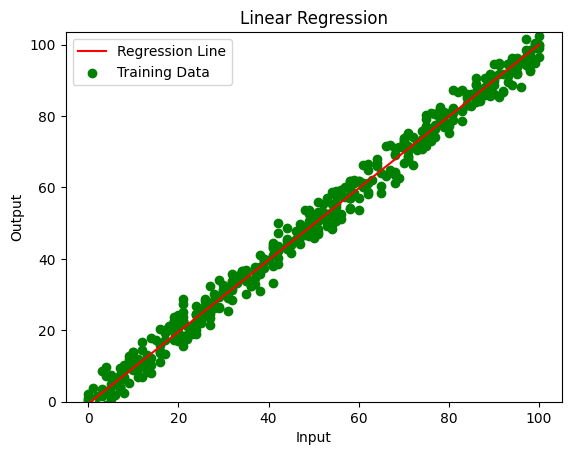

In [5]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)